# Practical 1

**Topic** : NLTK and Text Processing

**Granularity**


1.   Basic Text Processing
2.   Understanding RegEx
3.   Introduction to NLTK
4.   Exploring NLTK Capabilities





---



# Section 1 - Basic Text Processing



*   Working with f-strings (formatted string literals) to format printed text

## Formatted String Literals (f-strings)

There are 2 ways of formatting string literals
1. Old `.format()` method
2. Using `f-strings` method

In [1]:
name = 'Anant'

# Using the old .format() method:
print('His name is {var}.'.format(var=name))

# Using f-strings:
print(f'His name is {name}.')

His name is Anant.
His name is Anant.


Pass `!r` to get the string representation:

In [2]:
print(f'His name is {name!r}')

His name is 'Anant'


**Common Errors -**

Be careful not to let quotation marks in the replacement fields conflict with the quoting used in the outer string:

In [3]:
d = {'a':123,'b':456}

print(f'Address: {d['a']} Main Street')

SyntaxError: ignored

**Correct Method -**

In [4]:
d = {'a':123,'b':456}

print(f"Address: {d['a']} Main Street")

Address: 123 Main Street


**Minimum Widths, Alignment and Padding**

You can pass arguments inside a nested set of curly braces to set a minimum width for the field, the alignment and even padding characters.

In [5]:
library = [('Author', 'Topic', 'Pages'), ('Twain', 'Rafting', 601), ('Feynman', 'Physics', 95), ('Hamilton', 'Mythology', 144)]

for book in library:
    print(f'{book[0]:{10}} {book[1]:{8}} {book[2]:{7}}')

Author     Topic    Pages  
Twain      Rafting      601
Feynman    Physics       95
Hamilton   Mythology     144


Here the first three lines align, except `Pages` follows a default left-alignment while numbers are right-aligned. Also, the fourth line's page number is pushed to the right as `Mythology` exceeds the minimum field width of `8`. When setting minimum field widths make sure to take the longest item into account.

To set the alignment, use the character `<` for left-align, `^` for center, `>` for right.
To set padding, precede the alignment character with the padding character (`-` and `.` are common choices).



Adjustments for Strings

In [6]:
for book in library:
    print(f'{book[0]:{10}} {book[1]:{10}} {book[2]:.>{7}}') # here .> was added

Author     Topic      ..Pages
Twain      Rafting    ....601
Feynman    Physics    .....95
Hamilton   Mythology  ....144


## Iterating through a File

In [7]:
with open('test.txt','r') as txt:
    for line in txt:
        print(line, end='')  # the end='' argument removes extra linebreaks

This is a new first line
This line is being appended to test.txt
And another line here.
This is more text being appended to test.txt
And another line here.



---



# Section 2 - Understanding RegEx

Regular Expressions (sometimes called regex for short) allow a user to search for strings using almost any sort of rule they can come up with. For example, finding all capital letters in a string, or finding a phone number in a document.

Regular expressions are notorious for their seemingly strange syntax. This strange syntax is a byproduct of their flexibility. Regular expressions have to be able to filter out any string pattern you can imagine, which is why they have a complex string pattern format.

Regular expressions are handled using Python's built-in re library. See the [docs](https://docs.python.org/3/library/re.html) for more information.

## Basic Pattern Searching

Consider the following string-

In [8]:
text = "The electrician's phone number is 408-555-1234."

We'll start off by trying to find out if the string "phone" is inside the text string. Now we could quickly do this with:

In [9]:
'phone' in text

True

But let's show the format for regular expressions, because later on we will be searching for patterns that won't have such a simple solution.

In [10]:
import re

In [11]:
pattern = 'phone'

In [12]:
re.search(pattern,text)

<re.Match object; span=(18, 23), match='phone'>

In [13]:
pattern = "NOT IN TEXT"

In [14]:
re.search(pattern,text)

Now we've seen that re.search() will take the pattern, scan the text, and then returns a Match object. If no pattern is found, a None is returned (in Jupyter Notebook this just means that nothing is output below the cell).

Let's take a closer look at this Match object.

In [15]:
pattern = 'phone'

In [16]:
match = re.search(pattern,text)

In [17]:
match

<re.Match object; span=(18, 23), match='phone'>

Notice the span, there is also a start and end index information.

In [18]:
match.span()

(18, 23)

In [19]:
match.start()

18

In [20]:
match.end()

23

But what if the pattern occurs more than once?

In [21]:
text = "I bought a new phone as my old phone stopped working."

In [22]:
match = re.search("phone",text)

In [23]:
match.span()

(15, 20)

Notice it only matches the first instance. If we wanted a list of all matches, we can use `.findall()` method:

In [24]:
matches = re.findall("phone",text)

In [25]:
matches

['phone', 'phone']

In [26]:
len(matches)

2

To get actual match objects, use the iterator:

In [27]:
for match in re.finditer("phone",text):
    print(match.span())

(15, 20)
(31, 36)


In [28]:
match.group()

'phone'

## Patterns

So far we've learned how to search for a basic string. What about more complex examples? Such as trying to find a telephone number in a large string of text? Or an email address?

We could just use search method if we know the exact phone or email, but what if we don't know it? We may know the general format, and we can use that along with regular expressions to search the document for strings that match a particular pattern.

This is where the syntax may appear strange at first, but take your time with this; often it's just a matter of looking up the pattern code.



## Identifiers for Characters in Patterns

Characters such as a digit or a single string have different codes that represent them. You can use these to build up a pattern string. Notice how these make heavy use of the backwards slash \ . Because of this when defining a pattern string for regular expression we use the format:

r'mypattern'

placing the r in front of the string allows python to understand that the \ in the pattern string are not meant to be escape slashes.

Some of the possible identifiers are given below -

<table ><tr><th>Character</th><th>Description</th><th>Example Pattern Code</th><th >Exammple Match</th></tr>

<tr ><td><span >\d</span></td><td>A digit</td><td>file_\d\d</td><td>file_25</td></tr>

<tr ><td><span >\w</span></td><td>Alphanumeric</td><td>\w-\w\w\w</td><td>A-b_1</td></tr>



<tr ><td><span >\s</span></td><td>White space</td><td>a\sb\sc</td><td>a b c</td></tr>



<tr ><td><span >\D</span></td><td>A non digit</td><td>\D\D\D</td><td>ABC</td></tr>

<tr ><td><span >\W</span></td><td>Non-alphanumeric</td><td>\W\W\W\W\W</td><td>*-+=)</td></tr>

<tr ><td><span >\S</span></td><td>Non-whitespace</td><td>\S\S\S\S</td><td>Yoyo</td></tr></table>

In [29]:
text = "My telephone number is 408-555-1234"

In [30]:
phone = re.search(r'\d\d\d-\d\d\d-\d\d\d\d',text)

In [31]:
phone.group()

'408-555-1234'

## Quantifiers

Now that we know the special character designations, we can use them along with quantifiers to define how many we expect.



<table ><tr><th>Character</th><th>Description</th><th>Example Pattern Code</th><th >Exammple Match</th></tr>

<tr ><td><span >+</span></td><td>Occurs one or more times</td><td>	Version \w-\w+</td><td>Version A-b1_1</td></tr>

<tr ><td><span >{3}</span></td><td>Occurs exactly 3 times</td><td>\D{3}</td><td>abc</td></tr>



<tr ><td><span >{2,4}</span></td><td>Occurs 2 to 4 times</td><td>\d{2,4}</td><td>123</td></tr>



<tr ><td><span >{3,}</span></td><td>Occurs 3 or more</td><td>\w{3,}</td><td>anycharacters</td></tr>

<tr ><td><span >\*</span></td><td>Occurs zero or more times</td><td>A\*B\*C*</td><td>AAACC</td></tr>

<tr ><td><span >?</span></td><td>Once or none</td><td>plurals?</td><td>plural</td></tr></table>


Let's rewrite our pattern using these quantifiers:

In [32]:
re.search(r'\d{3}-\d{3}-\d{4}',text)

<re.Match object; span=(23, 35), match='408-555-1234'>

## Groupings

What if we wanted to do two tasks, find phone numbers, but also be able to quickly extract their area code (the first three digits). We can use groups for any general task that involves grouping together regular expressions (so that we can later break them down).

Using the phone number example, we can separate groups of regular expressions using parentheses:

In [34]:
phone_pattern = re.compile(r'(\d{3})-(\d{3})-(\d{4})')

In [35]:
results = re.search(phone_pattern,text)

In [38]:
# The entire result
results.group()

'408-555-1234'

In [37]:
# Can then also call by group position.
# remember groups were separated by parentheses ()
# Something to note is that group ordering starts at 1. Passing in 0 returns everything
results.group(1)

'408'

In [39]:
results.group(2)

'555'

In [40]:
results.group(3)

'1234'

---

# Section 3 - Introduction to NLTK

NLTK is a toolkit build for working with NLP in Python. It provides us various text processing libraries with a lot of test datasets. A variety of tasks can be performed using NLTK such as tokenizing, parse tree visualization, etc…



In [41]:
!pip install nltk

## Downloading the datasets:
This is optional, but if you feel that you need those datasets before starting to work on the problem.

In [42]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to /root/nltk_data...
       |   Package basque_grammars is already up-to-date!
       | Downloading package bcp47 to /root/nltk_data...
       |   Package bcp47 is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Packag


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

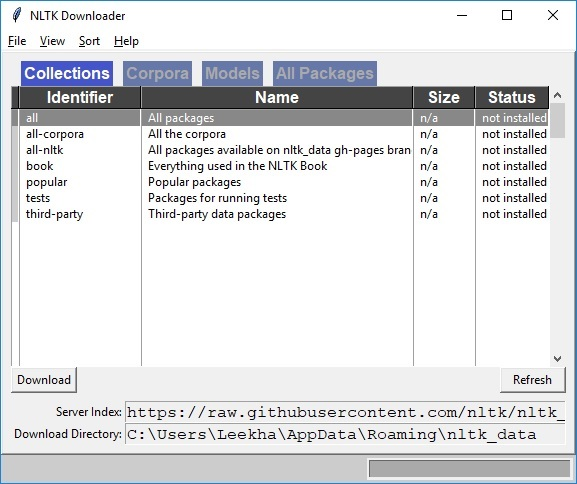

You can see this screen and install the required corpus. Once you have completed this step let’s dive deep into the different operations using NLTK.

---

# Section 4 - Exploring NLTK Capabilities

1. Tokenization
2. Lower case conversion
3. Stop Words removal
4. Stemming
5. Lemmatization
6. POS Tagging

## Tokenization


In [43]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

text = "Natural language processing is an exciting area. Huge budget have been allocated for this."

print(sent_tokenize(text))
print(word_tokenize(text))

['Natural language processing is an exciting area.', 'Huge budget have been allocated for this.']
['Natural', 'language', 'processing', 'is', 'an', 'exciting', 'area', '.', 'Huge', 'budget', 'have', 'been', 'allocated', 'for', 'this', '.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Lowercase Conversion

In [44]:
import re

In [45]:
text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
words = text.split()
print(words)

['natural', 'language', 'processing', 'is', 'an', 'exciting', 'area', 'huge', 'budget', 'have', 'been', 'allocated', 'for', 'this']


## Stopword removal

In [46]:
from nltk.corpus import stopwords

print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [47]:
words = [w for w in words if w not in stopwords.words('english')]
print(words)

['natural', 'language', 'processing', 'exciting', 'area', 'huge', 'budget', 'allocated']


## Stemming

In [48]:
from nltk.stem.porter import PorterStemmer
# Reduce words to their stems
stemmed_by_porter = [PorterStemmer().stem(w) for w in words]
print(stemmed_by_porter)

['natur', 'languag', 'process', 'excit', 'area', 'huge', 'budget', 'alloc']


In [49]:
from nltk.stem.lancaster import LancasterStemmer
# Reduce words to their stems
stemmed_by_lancaster = [LancasterStemmer().stem(w) for w in words]
print(stemmed_by_lancaster)

['nat', 'langu', 'process', 'excit', 'are', 'hug', 'budget', 'alloc']


In [50]:
from nltk.stem.snowball import SnowballStemmer
# Reduce words to their stems
stemmed_by_snowball = [SnowballStemmer(language = 'english').stem(w) for w in words]
print(stemmed_by_snowball)

['natur', 'languag', 'process', 'excit', 'area', 'huge', 'budget', 'alloc']


## Lemmatization

In [51]:
from nltk.stem.wordnet import WordNetLemmatizer
# Reduce words to their root form
lemmed = [WordNetLemmatizer().lemmatize(w) for w in words]
print(lemmed)

['natural', 'language', 'processing', 'exciting', 'area', 'huge', 'budget', 'allocated']


## POS Tagger

In [52]:
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))
txt = "Natural language processing is an exciting area."

# sent_tokenize is one of instances of
# PunktSentenceTokenizer from the nltk.tokenize.punkt module
tokenized = sent_tokenize(txt)
for i in tokenized:
  # Word tokenizers is used to find the words
  # and punctuation in a string
  wordsList = nltk.word_tokenize(i)
  # removing stop words from wordList
  wordsList = [w for w in wordsList if not w in stop_words]
  # Using a Tagger. Which is part-of-speech
  # tagger or POS-tagger.
  tagged = nltk.pos_tag(wordsList)
  print(tagged)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Natural', 'JJ'), ('language', 'NN'), ('processing', 'NN'), ('exciting', 'JJ'), ('area', 'NN'), ('.', '.')]


---